In [4]:
import json 
import yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.statistics_dataset import load_coco, category_distribution, bbox_size_distribution

with open('configs.yaml', 'r', encoding='utf-8') as f:
    cf = yaml.safe_load(f)

In [5]:
train2017 = cf['data']['raw_images']['train']
train2017_anns = cf['data']['raw_annotations']['train']

train2017_10cls = cf['data']['images']['train']
train2017_anns_10cls = cf['data']['annotations']['train']

In [6]:
def bar_plot(df, x, y):
    
    plt.figure(figsize=(8, len(df) * 0.3))
    sns.barplot(
        data=df,
        y=y,
        x=x
    )
    plt.tight_layout()
    plt.show()

---

# Full dataset

In [7]:
coco = load_coco(train2017_anns)

df_cat = category_distribution(coco)
df_bbox_size = bbox_size_distribution(coco)

loading annotations into memory...
Done (t=17.48s)
creating index...
index created!


In [20]:
df_cat

,category_name,num_instances
78,hair drier,198
70,toaster,225
12,parking meter,1285
21,bear,1294
76,scissors,1481
...,...,...
39,bottle,24342
73,book,24715
56,chair,38491
2,car,43867


    category_name  num_instances
78     hair drier            198
70        toaster            225
12  parking meter           1285
21           bear           1294
76       scissors           1481
..            ...            ...
39         bottle          24342
73           book          24715
56          chair          38491
2             car          43867
0          person         262465

[80 rows x 2 columns]


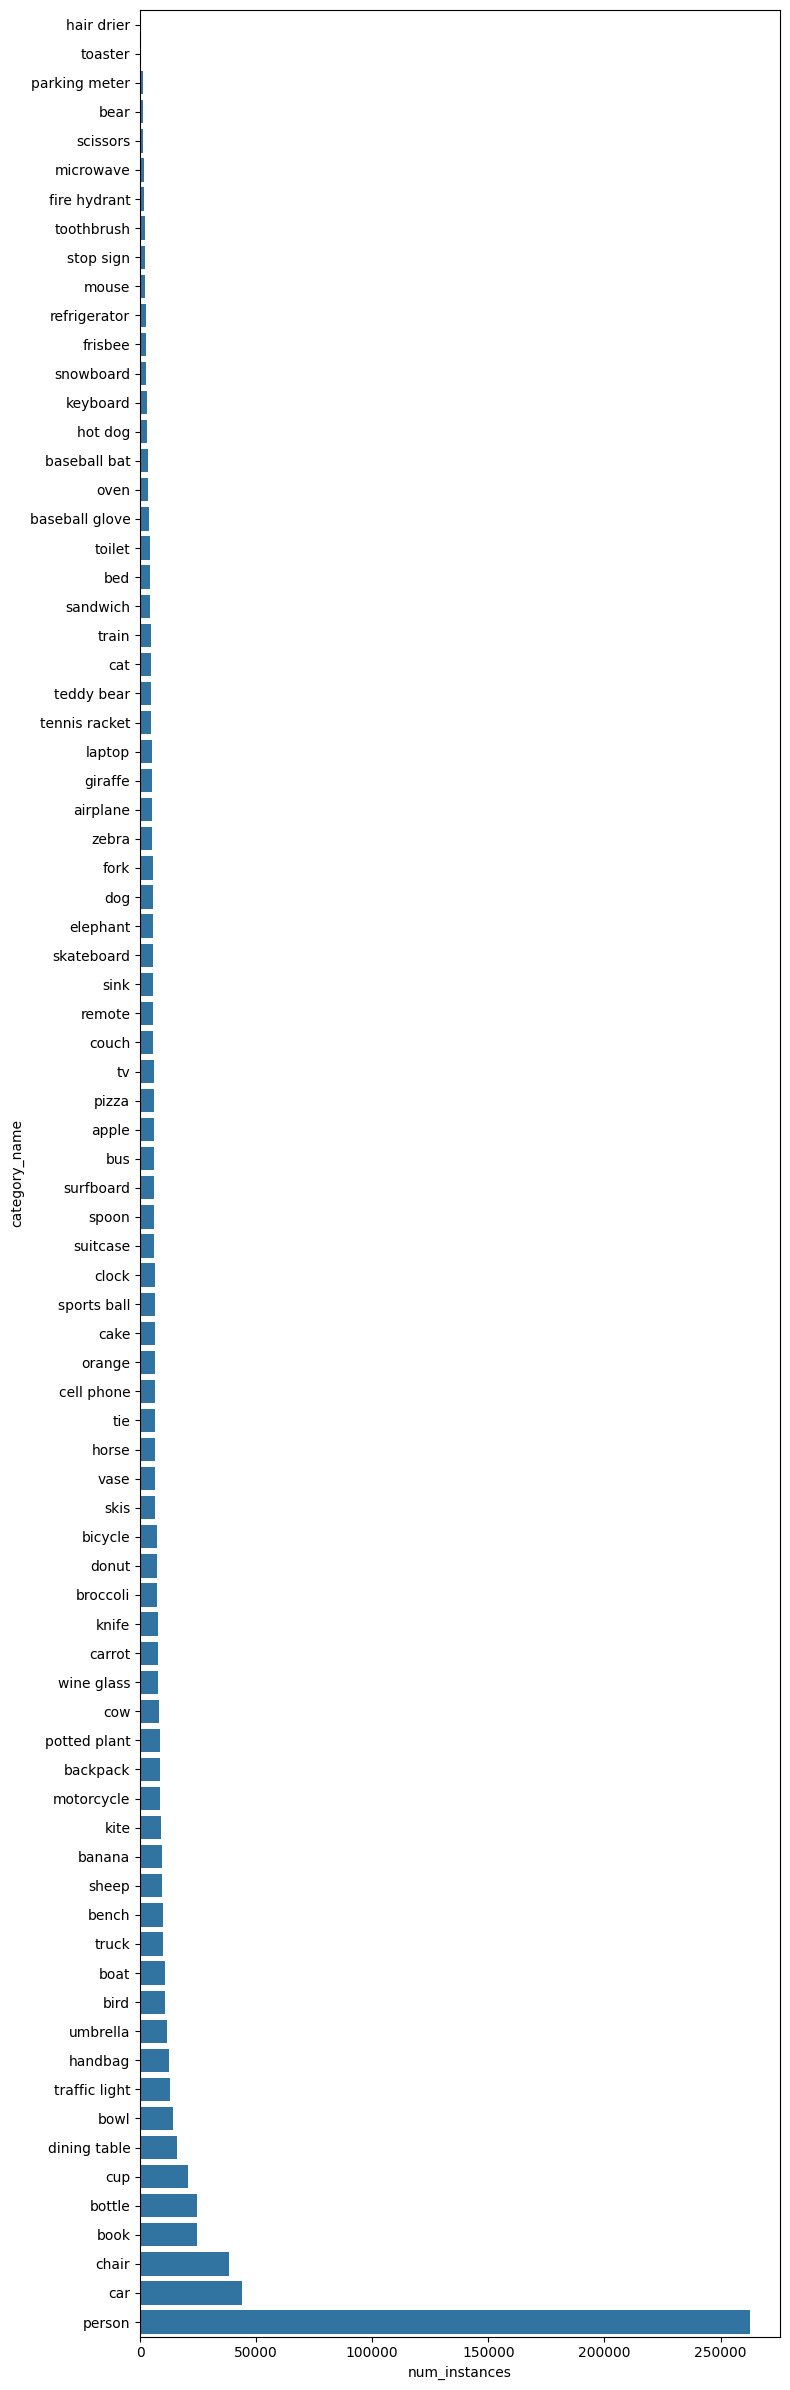

In [ ]:
bar_plot(df_cat, "num_instances", "category_name")

     size   count
0   small  356340
1  medium  295163
2   large  208498


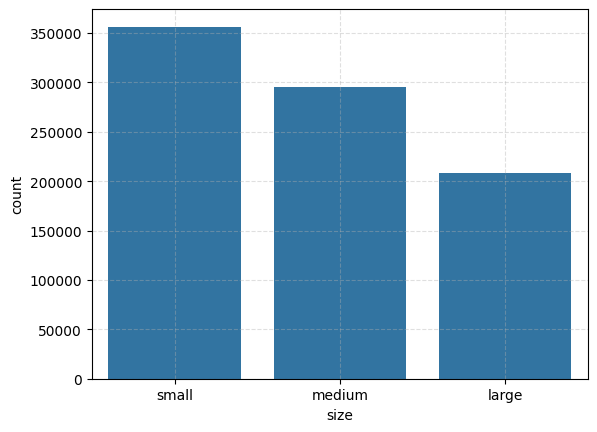

In [ ]:
print(df_bbox_size)
sns.barplot(df_bbox_size, x='size', y='count')
plt.grid(linestyle='--', alpha=0.4)

---

# Split dataset (10 classes)

loading annotations into memory...
Done (t=1.86s)
creating index...
index created!
    category_name  num_instances
9            oven           3334
5  baseball glove           3747
3         giraffe           5131
0        airplane           5135
8          remote           5703
7            cake           6353
2           horse           6587
4            skis           6646
6      wine glass           7913
1            boat          10759


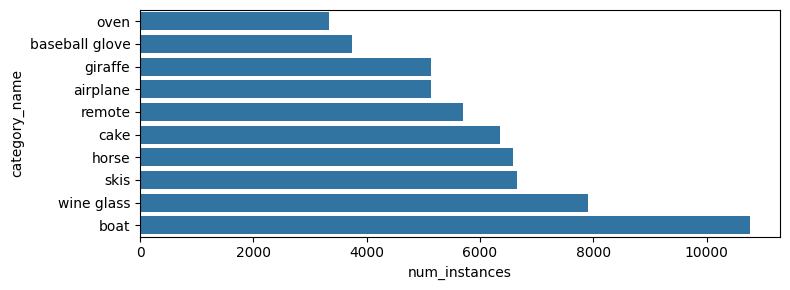

In [11]:
coco_10cls = load_coco(train2017_anns_10cls) # load anns 10 classes

df_cat_10cls = category_distribution(coco_10cls)
print(df_cat_10cls)
bar_plot(df_cat_10cls, "num_instances", "category_name")

     size  count
0   small  24861
1  medium  20330
2   large  16117


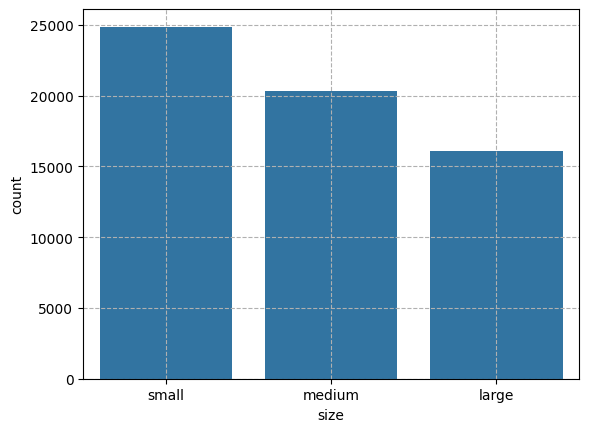

In [ ]:
df_bbox_size_10cls = bbox_size_distribution(coco_10cls)
print(df_bbox_size_10cls)
sns.barplot(df_bbox_size_10cls, x='size', y='count')
plt.grid(linestyle='--', alpha=0.4)